In [1]:
import os
import numpy as np
import sys
import nibabel as nib
import matplotlib.pyplot as plt

In [2]:
def show_slices(slices,clims=[0.0,0.0]):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1,len(slices))
    for i, slice in enumerate(slices):
        if clims==[0.0,0.0]:
            axes[i].imshow(slice.T, cmap='gray', origin="lower")
        else:
            axes[i].imshow(slice.T, cmap='gray', origin="lower", clim=clims)
            
def maxk(A,k):
    B=np.sort(np.ndarray.flatten(A))
    t=size(B)
    y=B[t-k+1:]
    return y

def size(A):
    sizei = 1
    for dim in np.shape(A): sizei *= dim
    return sizei


In [3]:
print('Number of arguments:', len(sys.argv), 'arguments.')
a=sys.argv[1:]
print('Argument List:', a)

if not a:
    print('Please provide arguments for the python script:')
    print('    first argument: directory where the data is stored')
    print('    second argument: subject ID of the patient (prefix of the image name, including the scan number)')
    print('                     (for example Subject_01_MTR_6_1 )')
    print('    third argument: suffix of the image (either .img, .nii or .nii.gz)')
    print('    fourth argument: reconstruction software (either ptoa or dcm2niix)')
    print('')
    print('N.B.: Please check that there is no full stop (.) inside the file name.')
    sys.exit()
elif a[0]=='-f' or a[0]=='--ip=127.0.0.1':
    print('You are on the notebook, please check below the ID, directory and suffix of images provided.')
    #in_dir='C:\\Users\\ppzom1\\Downloads\\OneDrive_1_17-06-2021'
    #in_dir='C:\\Users\\ppzom1\\Documents\\data\\7T'
    #sub_ID='7T_PSIR_0.55mmPitts_20220208163931_6'
    in_dir='C:\\Users\\ppzom1\\OneDrive - The University of Nottingham\\Documents\\data\\7T\\IRL_01'
    sub_ID='IRL_01_MT1x1x2mm_20230116153738_7'
    acq='Notts' 
    sub_dir=in_dir+'\\'+sub_ID
    suffix='.nii'
    recon='dcm2niix'
    show_data=True
else:
    in_dir=a[0]
    sub_ID=a[1]
    suffix=a[2]
    recon=a[3]
    resol=a[4]
    sub_dir=in_dir+'/'+sub_ID
    show_data=True


print(os.getcwd())
out_dir = os.path.join(in_dir)

### Need to remove the . in filenames otherwise conflicts!!! such as this
#EPI_AK_06_WIP_PSIR_UK7T_0.7mm_BestNPI_SENSE_5_1_modulus_cphase00

#sub_ID='MEPFM_Sub15_WIP_MP2RAGE_8_1'
#sub_dir=in_dir+'/'+sub_ID
#suffix='.img'

Number of arguments: 3 arguments.
Argument List: ['-f', 'C:\\Users\\ppzom1\\AppData\\Roaming\\jupyter\\runtime\\kernel-10986b63-b098-4c64-b38a-cf4b2a04b674.json']
You are on the notebook, please check below the ID, directory and suffix of images provided.
C:\Users\ppzom1\OneDrive - The University of Nottingham\Documents\Code\PSIR


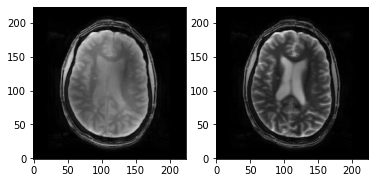

In [4]:
if recon == 'ptoa':
    img=nib.load(sub_dir+'_modulus'+suffix)
elif recon == 'dcm2niix':
    img=nib.load(sub_dir+suffix)

    
hdr = img.header
img_data=np.squeeze(img.get_fdata())

imgm1_data=np.squeeze(img_data[:,:,:,0])
imgm2_data=np.squeeze(img_data[:,:,:,1])


if show_data:
    midslice=int(imgm1_data.shape[2]/2)
    midy=int(imgm1_data.shape[1]/2)
    midx=int(imgm1_data.shape[0]/2)
    show_slices([np.abs(imgm1_data[:,:,midslice]),
                 np.abs(imgm2_data[:,:,midslice])])

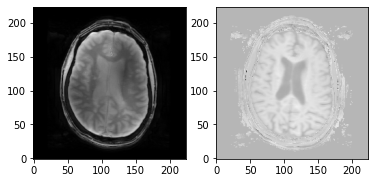

In [5]:

S1 = imgm1_data
S2 = imgm2_data

MTRdiff = ( S1 - S2 ) 
MTR = np.divide(MTRdiff,S1,out=np.zeros_like(S1), where=(S1>100000))

if show_data:
    show_slices([np.real(S1[:,:,midslice]),
                 np.real(MTR[:,:,midslice])])
    
MTR_img = nib.nifti1.Nifti1Image(MTR, None, header=img.header)
MTR_img.set_data_dtype(np.float32)
MTR_img.to_filename(sub_dir+'_MTR.nii.gz')    
